In [1]:
from drl import DEMSimulator
from drl.utils import load_config
from drl import RainfallSimulator
from drl import DiffusiveWaveRouter, ShallowWaterRouter
from drl.utils import save_h, save_h_quads, make_routing_gif, make_quad_rainfall_gif, make_quad_routing_gif
from matplotlib import pyplot as plt
import numpy as np
from matplotlib.colors import LinearSegmentedColormap
from matplotlib import cm

In [2]:
# Example usage
dem_simulator = DEMSimulator("../config/config.yaml")
dem_simulator.generate_all_dems()
dems = dem_simulator.get_dems()

{'num_dems': 1, 'size': 64, 'hilliness_range': [2, 8], 'total_iterations': 150, 'river_freq': 25, 'default_smoothing_strength': 1.0, 'light_smoothing_strength': 0.5, 'river_step_range': [-10, 10], 'river_slope_ratio_range': [1, 4], 'river_max_steps': 64, 'trim_width': 5}


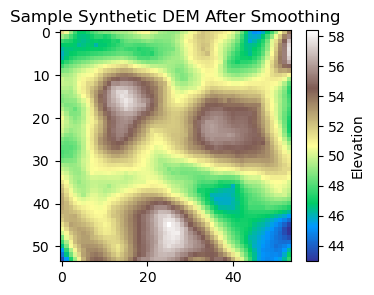

In [3]:
# Visualize one of the DEMs
for i in range(len(dems)):
    plt.figure(figsize=(4, 3))
    plt.imshow(dems[i], cmap='terrain')
    plt.colorbar(label='Elevation')
    plt.title('Sample Synthetic DEM After Smoothing')
    plt.show()

In [4]:
rain_simulator = RainfallSimulator("../config/config.yaml")
rain = rain_simulator.generate_all_directions(dems[0])  

In [5]:
len(rain)

4

In [6]:
#make_quad_rainfall_gif(rain, dems[0])

In [11]:
router_dif = DiffusiveWaveRouter(dem=dems[0], config_path="../config/config.yaml")
router_swe = ShallowWaterRouter(dem=dems[0], config_path="../config/config.yaml")
h_dict_dif = {}
h_dict_swe = {}
for i in ["north", "south", "east", "west"]:
    router_dif.reset()
    router_swe.reset()
    h_dict_dif[i] = router_dif.run(rain[i])
    h_dict_swe[i] = router_dif.run(rain[i])

Routing: 100%|██████████| 82/82 [00:00<00:00, 9749.22it/s]


In [12]:
save_h(h_dict_dif[i], dem=dems[0], cmap="Blues", alpha=.8, vmax=1)
make_routing_gif(gif_name='routing_dif.gif', fps=15)
save_h(h_dict_swe[i], dem=dems[0], cmap="Blues", alpha=.8, vmax=1)
make_routing_gif(gif_name='routing_swe.gif', fps=15)

✅ GIF saved to outputs/routing/routing_dif.gif
✅ GIF saved to outputs/routing/routing_swe.gif


In [ ]:
save_h_quads(h_dict_swe, dem=dems[0], out_dir='outputs/routing', vmin=0, vmax=1, alpha=0.6, n_contours=20)
make_quad_routing_gif(out_dir='outputs/routing', gif_name='routing_swe_quads.gif', fps=25, cleanup=True)
save_h_quads(h_dict_dif, dem=dems[0], out_dir='outputs/routing', vmin=0, vmax=1, alpha=0.6, n_contours=20)
make_quad_routing_gif(out_dir='outputs/routing', gif_name='routing_dif_quads.gif', fps=25, cleanup=True)

/Users/jmframe/deep_routing_lab/src/drl/utils/viz.py:245: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.9, 1])


✅ Quadrant routing images saved to outputs/routing
✅ Quadrant routing GIF saved to outputs/routing/routing_swe_quads.gif
